<a href="https://colab.research.google.com/github/OlehVakulchyk/DataScience/blob/main/HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:

кількість шарів;

кількість нейронів;

функції активації;

кількість епох;

розмір батчу;

вибір оптимізатора;

різні техніки регуляризації і т.д.

Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.

Рішення оформіть у вигляді окремого ноутбука.

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical #, plot_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout   #, BatchNormalization
from keras.optimizers import Adam, AdamW, RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers


In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

num_classes = 10
num_features = np.product(x_train.shape[1:])

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
num_classes = 10
num_features = 28 * 28 * 1
learning_rate = 0.001
batch_size = 256
epochs = 100

# Модель 1 - 0.9051

шарів - 6, нейронів - 1024, activation='relu', optimizer=Adam, batch_size = 256,
epochs = 100

Dense/Dropout = '1024/0.2-512/0.3-512/0.4-256/0.3-128/0.2-10'

regularizers.l2(0.00001)

In [ ]:
learning_rate = 0.001
batch_size = 256
epochs = 100
activation='relu'
optimizer=Adam
loss='categorical_crossentropy'

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(1024, activation=activation, input_shape=(num_features,), kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.2),
    Dense(512, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(512, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.4),
    Dense(256, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(128, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )



Epoch 1/100
234/234 [==============================] - 15s 8ms/step - loss: 0.7163 - accuracy: 0.7469 - val_loss: 0.4698 - val_accuracy: 0.8355 - lr: 0.0010
Epoch 2/100
234/234 [==============================] - 1s 6ms/step - loss: 0.4630 - accuracy: 0.8466 - val_loss: 0.4289 - val_accuracy: 0.8568 - lr: 0.0010
Epoch 3/100
234/234 [==============================] - 2s 8ms/step - loss: 0.4194 - accuracy: 0.8609 - val_loss: 0.4150 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 4/100
234/234 [==============================] - 2s 8ms/step - loss: 0.3914 - accuracy: 0.8712 - val_loss: 0.3970 - val_accuracy: 0.8631 - lr: 0.0010
Epoch 5/100
234/234 [==============================] - 2s 9ms/step - loss: 0.3741 - accuracy: 0.8751 - val_loss: 0.3845 - val_accuracy: 0.8672 - lr: 0.0010
Epoch 6/100
234/234 [==============================] - 2s 7ms/step - loss: 0.3608 - accuracy: 0.8799 - val_loss: 0.3824 - val_accuracy: 0.8732 - lr: 0.0010
Epoch 7/100
234/234 [==============================] - 1s 6ms/s

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.4448 - accuracy: 0.9051

Train accuracy: 0.9800
Test accuracy: 0.9051
Difference accuracy: 7.49%


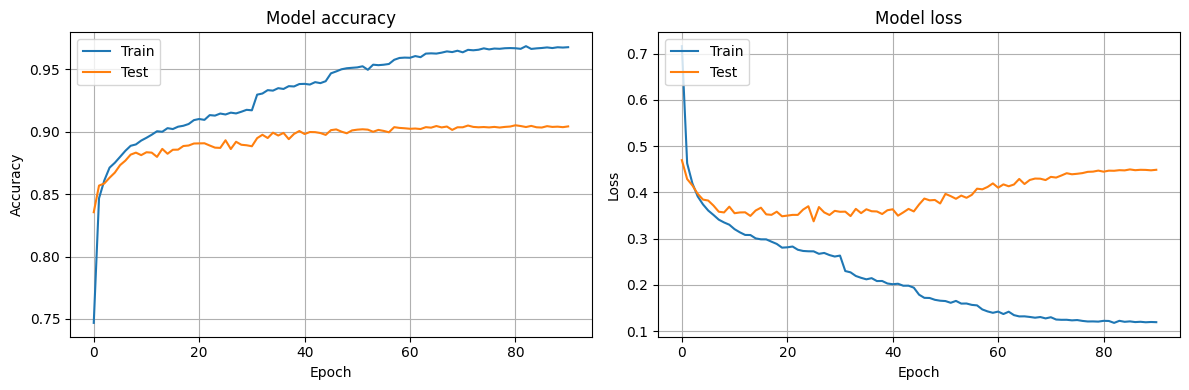

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# модель 2 - 0.9050

шарів - 6,
нейронів - 1024,
activation='relu',  
optimizer=Adam,
batch_size = 256,
epochs = 100

Dense_Dropout = '1024/0.2-512/0.3-512/0.4-256/0.3-128/0.2-10'

regularizers.l2(0.00001)

***learning_rate = 0.0001***

In [ ]:
learning_rate = 0.0001
batch_size = 256
epochs = 100
activation='relu'
optimizer=Adam
loss='categorical_crossentropy'

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(1024, activation=activation, input_shape=(num_features,), kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.2),
    Dense(512, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(512, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.4),
    Dense(256, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(128, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 1024)              803840    
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)              

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

Epoch 1/100
234/234 [==============================] - 3s 7ms/step - loss: 1.1741 - accuracy: 0.5907 - val_loss: 0.6046 - val_accuracy: 0.7952 - lr: 1.0000e-04
Epoch 2/100
234/234 [==============================] - 1s 6ms/step - loss: 0.6236 - accuracy: 0.7894 - val_loss: 0.4947 - val_accuracy: 0.8339 - lr: 1.0000e-04
Epoch 3/100
234/234 [==============================] - 1s 6ms/step - loss: 0.5208 - accuracy: 0.8290 - val_loss: 0.4555 - val_accuracy: 0.8463 - lr: 1.0000e-04
Epoch 4/100
234/234 [==============================] - 2s 8ms/step - loss: 0.4680 - accuracy: 0.8453 - val_loss: 0.4281 - val_accuracy: 0.8577 - lr: 1.0000e-04
Epoch 5/100
234/234 [==============================] - 2s 8ms/step - loss: 0.4351 - accuracy: 0.8578 - val_loss: 0.4141 - val_accuracy: 0.8600 - lr: 1.0000e-04
Epoch 6/100
234/234 [==============================] - 2s 8ms/step - loss: 0.4050 - accuracy: 0.8683 - val_loss: 0.4018 - val_accuracy: 0.8691 - lr: 1.0000e-04
Epoch 7/100
234/234 [===================

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.3831 - accuracy: 0.9050

Train accuracy: 0.9747
Test accuracy: 0.9050
Difference accuracy: 6.97%


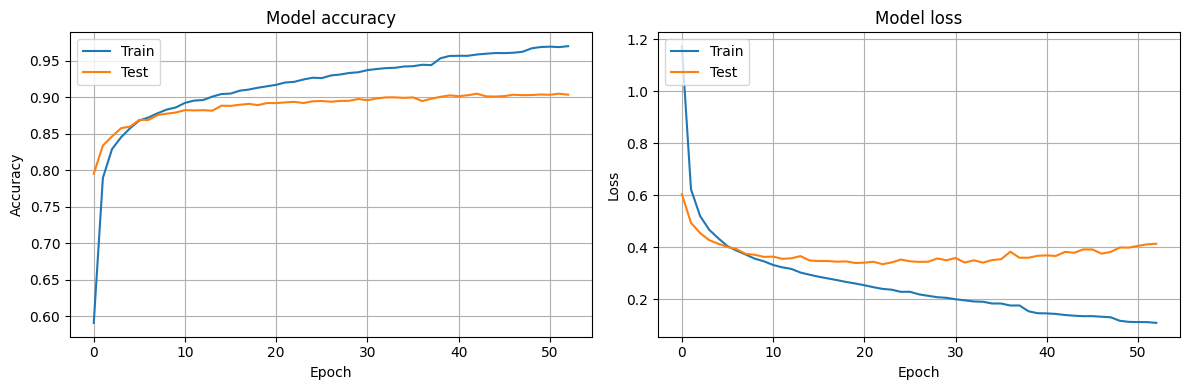

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Модель 3 - 0.9052

шарів - 6, нейронів - 1024, activation='relu', optimizer=Adam,
***batch_size = 1024*** ,
epochs = 100

Dense/Dropout = '1024/0.2-512/0.3-512/0.4-256/0.3-128/0.2-10'

regularizers.l2(0.00001)

***learning_rate = 0.001***

In [ ]:
learning_rate = 0.001
batch_size = 1024
epochs = 100
activation='relu'
optimizer=Adam

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(1024, activation=activation, input_shape=(num_features,), kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.2),
    Dense(512, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(512, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.4),
    Dense(256, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(128, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dropout_12 (Dropout)        (None, 512)              

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

Epoch 1/100
58/58 [==============================] - 4s 15ms/step - loss: 0.9346 - accuracy: 0.6626 - val_loss: 0.5296 - val_accuracy: 0.8200 - lr: 0.0010
Epoch 2/100
58/58 [==============================] - 1s 10ms/step - loss: 0.5072 - accuracy: 0.8316 - val_loss: 0.4412 - val_accuracy: 0.8505 - lr: 0.0010
Epoch 3/100
58/58 [==============================] - 1s 9ms/step - loss: 0.4303 - accuracy: 0.8590 - val_loss: 0.4102 - val_accuracy: 0.8644 - lr: 0.0010
Epoch 4/100
58/58 [==============================] - 1s 9ms/step - loss: 0.4040 - accuracy: 0.8661 - val_loss: 0.3978 - val_accuracy: 0.8658 - lr: 0.0010
Epoch 5/100
58/58 [==============================] - 0s 8ms/step - loss: 0.3821 - accuracy: 0.8751 - val_loss: 0.3978 - val_accuracy: 0.8654 - lr: 0.0010
Epoch 6/100
58/58 [==============================] - 0s 8ms/step - loss: 0.3602 - accuracy: 0.8814 - val_loss: 0.3690 - val_accuracy: 0.8764 - lr: 0.0010
Epoch 7/100
58/58 [==============================] - 1s 9ms/step - loss: 0

313/313 [==============================] - 1s 3ms/step - loss: 0.3963 - accuracy: 0.9052

Train accuracy: 0.9751
Test accuracy: 0.9052
Difference accuracy: 6.99%


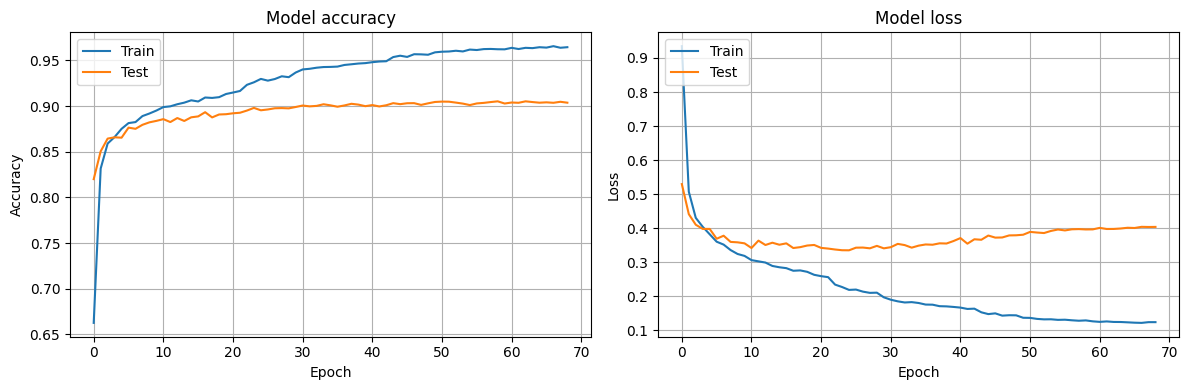

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Модель 4 - 0.9101

***шарів - 5, нейронів - 4096,*** activation='relu', optimizer=Adam, batch_size = 1024,
epochs = 100

Dense/Dropout = '4096/0.2-2048/0.3-1024/0.4-512/0.2-10'

regularizers.l2(0.00001)

learning_rate = 0.001

In [ ]:
learning_rate = 0.001
batch_size = 1024
epochs = 100
activation='relu'
optimizer=Adam

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

num_classes = 10
num_features = np.product(x_train.shape[1:])

steps_per_epoch = len(x_train) // batch_size

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(4096, activation=activation, input_shape=(784,), kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.2),
    Dense(2048, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(1024, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.4),
    Dense(512, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_70 (Dense)            (None, 4096)              3215360   
                                                                 
 dropout_47 (Dropout)        (None, 4096)              0         
                                                                 
 dense_71 (Dense)            (None, 2048)              8390656   
                                                                 
 dropout_48 (Dropout)        (None, 2048)              0         
                                                                 
 dense_72 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_49 (Dropout)        (None, 1024)            

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

Epoch 1/100
58/58 [==============================] - 3s 35ms/step - loss: 0.8104 - accuracy: 0.7238 - val_loss: 0.5211 - val_accuracy: 0.8358 - lr: 0.0010
Epoch 2/100
58/58 [==============================] - 2s 31ms/step - loss: 0.4667 - accuracy: 0.8540 - val_loss: 0.4407 - val_accuracy: 0.8635 - lr: 0.0010
Epoch 3/100
58/58 [==============================] - 2s 30ms/step - loss: 0.4106 - accuracy: 0.8707 - val_loss: 0.4246 - val_accuracy: 0.8670 - lr: 0.0010
Epoch 4/100
58/58 [==============================] - 2s 30ms/step - loss: 0.3865 - accuracy: 0.8768 - val_loss: 0.3991 - val_accuracy: 0.8717 - lr: 0.0010
Epoch 5/100
58/58 [==============================] - 3s 45ms/step - loss: 0.3626 - accuracy: 0.8868 - val_loss: 0.3954 - val_accuracy: 0.8772 - lr: 0.0010
Epoch 6/100
58/58 [==============================] - 3s 43ms/step - loss: 0.3494 - accuracy: 0.8898 - val_loss: 0.3872 - val_accuracy: 0.8775 - lr: 0.0010
Epoch 7/100
58/58 [==============================] - 2s 30ms/step - lo

313/313 [==============================] - 1s 4ms/step - loss: 0.3971 - accuracy: 0.9074

Train accuracy: 0.9727
Test accuracy: 0.9074
Difference accuracy: 6.53%


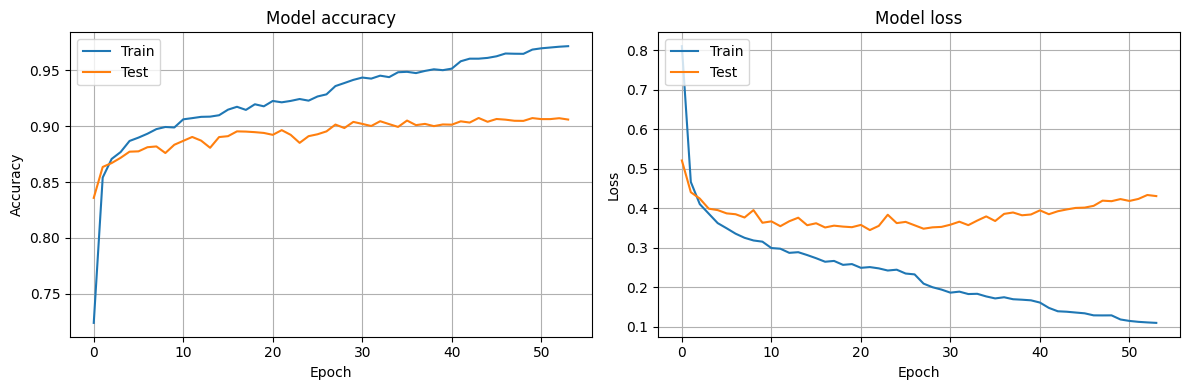

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Модель 5 - 0.9055

***шарів - 4, нейронів - 2048,*** activation='relu', optimizer=Adam, batch_size = 1024, epochs = 100

Dense_Dropout = '2048/0.3-1024/0.4-512/0.1-10'

regularizers.l2(0.00001)

In [ ]:
learning_rate = 0.001
batch_size = 1024
epochs = 100
activation='relu'
optimizer=Adam
loss='categorical_crossentropy'

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(2048, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(1024, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.4),
    Dense(512, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.1),
    Dense(10, activation='softmax'),
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 2048)              1607680   
                                                                 
 dropout_19 (Dropout)        (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_20 (Dropout)        (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dropout_21 (Dropout)        (None, 512)              

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

Epoch 1/100
58/58 [==============================] - 3s 23ms/step - loss: 0.7095 - accuracy: 0.7561 - val_loss: 0.4759 - val_accuracy: 0.8383 - lr: 0.0010
Epoch 2/100
58/58 [==============================] - 1s 13ms/step - loss: 0.4376 - accuracy: 0.8524 - val_loss: 0.4208 - val_accuracy: 0.8631 - lr: 0.0010
Epoch 3/100
58/58 [==============================] - 1s 12ms/step - loss: 0.3943 - accuracy: 0.8669 - val_loss: 0.3987 - val_accuracy: 0.8677 - lr: 0.0010
Epoch 4/100
58/58 [==============================] - 1s 12ms/step - loss: 0.3680 - accuracy: 0.8753 - val_loss: 0.3928 - val_accuracy: 0.8706 - lr: 0.0010
Epoch 5/100
58/58 [==============================] - 1s 12ms/step - loss: 0.3483 - accuracy: 0.8831 - val_loss: 0.3901 - val_accuracy: 0.8713 - lr: 0.0010
Epoch 6/100
58/58 [==============================] - 1s 12ms/step - loss: 0.3379 - accuracy: 0.8869 - val_loss: 0.3591 - val_accuracy: 0.8815 - lr: 0.0010
Epoch 7/100
58/58 [==============================] - 1s 12ms/step - lo

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.9055

Train accuracy: 0.9561
Test accuracy: 0.9055
Difference accuracy: 5.06%


1/1 [==============================] - 0s 96ms/step


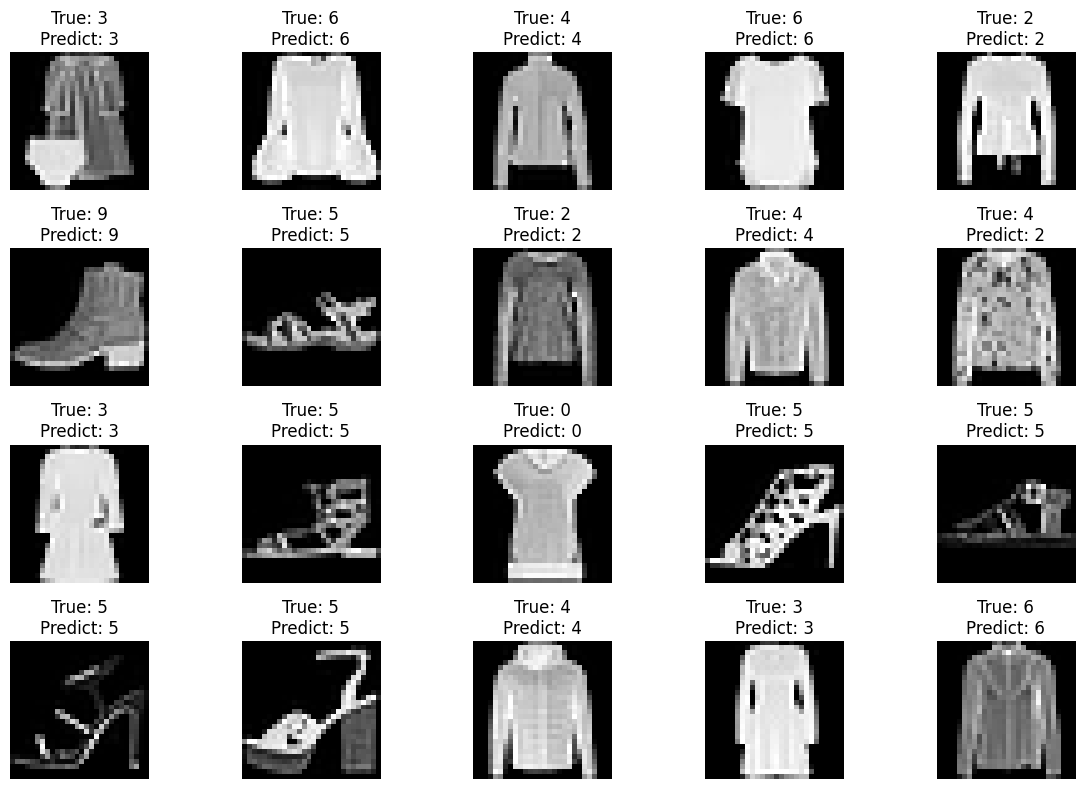

In [ ]:
num_images = 20
random_indices = np.random.choice(range(len(x_test)), size=num_images, replace=False)
predictions = model.predict(x_test[random_indices])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 8))
for i, index in enumerate(random_indices):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[index])}\nPredict: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

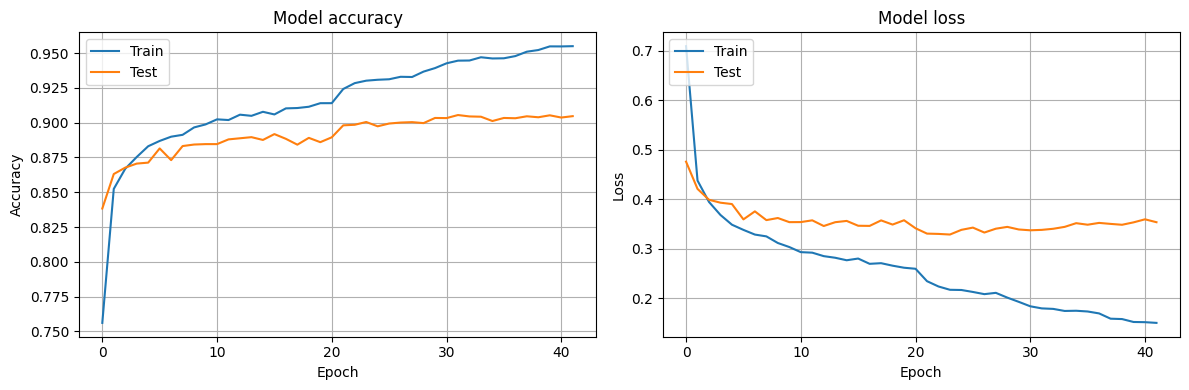

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Модель 6 - 0.0.9051
***шарів - 5, нейронів - 1024,*** activation='relu', optimizer=Adam, batch_size = 256, epochs = 100

Dense/Dropout = '1024/0.5-512/0.4-256/0.3-128-10'

***kernel_regularizer=not***

In [ ]:
learning_rate = 0.001
batch_size = 256
epochs = 100
activation='relu'
optimizer=Adam

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(1024, activation=activation),
    Dropout(0.5),
    Dense(512, activation=activation),
    Dropout(0.4),
    Dense(256, activation=activation),
    Dropout(0.3),
    Dense(128, activation=activation),
    Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_22 (Dropout)        (None, 1024)              0         
                                                                 
 dense_28 (Dense)            (None, 512)               524800    
                                                                 
 dropout_23 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dropout_24 (Dropout)        (None, 256)              

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

Epoch 1/100
234/234 [==============================] - 3s 6ms/step - loss: 0.6885 - accuracy: 0.7466 - val_loss: 0.4575 - val_accuracy: 0.8350 - lr: 0.0010
Epoch 2/100
234/234 [==============================] - 1s 5ms/step - loss: 0.4672 - accuracy: 0.8325 - val_loss: 0.4058 - val_accuracy: 0.8553 - lr: 0.0010
Epoch 3/100
234/234 [==============================] - 1s 5ms/step - loss: 0.4212 - accuracy: 0.8457 - val_loss: 0.3959 - val_accuracy: 0.8558 - lr: 0.0010
Epoch 4/100
234/234 [==============================] - 1s 5ms/step - loss: 0.4057 - accuracy: 0.8513 - val_loss: 0.3713 - val_accuracy: 0.8652 - lr: 0.0010
Epoch 5/100
234/234 [==============================] - 1s 6ms/step - loss: 0.3874 - accuracy: 0.8579 - val_loss: 0.3675 - val_accuracy: 0.8640 - lr: 0.0010
Epoch 6/100
234/234 [==============================] - 1s 5ms/step - loss: 0.3751 - accuracy: 0.8642 - val_loss: 0.3620 - val_accuracy: 0.8711 - lr: 0.0010
Epoch 7/100
234/234 [==============================] - 2s 7ms/st

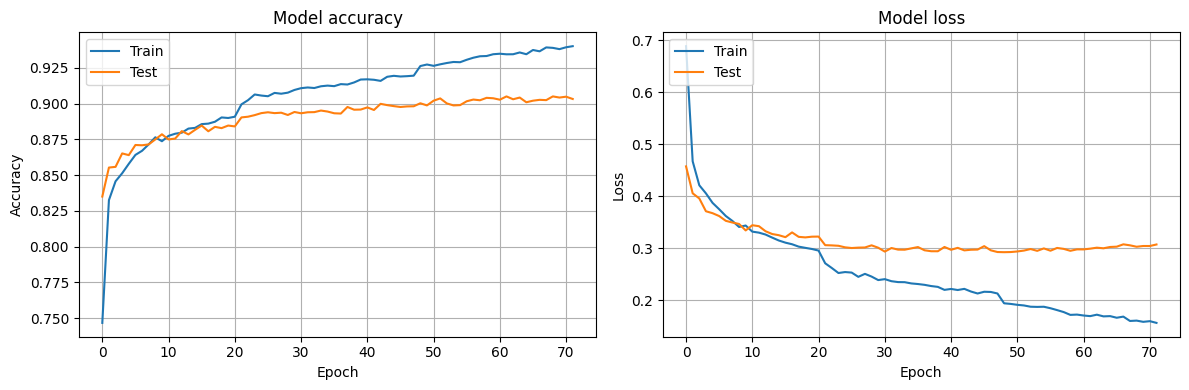

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Модель 7 - 0.9018
шарів - 5, нейронів - 1024, activation='relu', optimizer=AdamW, batch_size = 256, epochs = 100

Dense_Dropout = '1024/0.5-512/0.4-256/0.3-128-10'

***regularizers.l2(0.00001)***

In [ ]:
learning_rate = 0.001
batch_size = 256
epochs = 100
Dense_Dropout = '1024/0.5-512/0.4-256/0.3-128-10'
activation='relu'
optimizer=AdamW
loss='categorical_crossentropy'

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(1024, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.5),
    Dense(512, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.4),
    Dense(256, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(128, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_25 (Dropout)        (None, 1024)              0         
                                                                 
 dense_33 (Dense)            (None, 512)               524800    
                                                                 
 dropout_26 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 dropout_27 (Dropout)        (None, 256)              

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

Epoch 1/100
234/234 [==============================] - 4s 10ms/step - loss: 0.6956 - accuracy: 0.7535 - val_loss: 0.4901 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 2/100
234/234 [==============================] - 2s 7ms/step - loss: 0.4833 - accuracy: 0.8344 - val_loss: 0.4486 - val_accuracy: 0.8493 - lr: 0.0010
Epoch 3/100
234/234 [==============================] - 1s 6ms/step - loss: 0.4504 - accuracy: 0.8435 - val_loss: 0.4223 - val_accuracy: 0.8560 - lr: 0.0010
Epoch 4/100
234/234 [==============================] - 1s 5ms/step - loss: 0.4288 - accuracy: 0.8530 - val_loss: 0.4155 - val_accuracy: 0.8574 - lr: 0.0010
Epoch 5/100
234/234 [==============================] - 1s 6ms/step - loss: 0.4138 - accuracy: 0.8590 - val_loss: 0.3882 - val_accuracy: 0.8672 - lr: 0.0010
Epoch 6/100
234/234 [==============================] - 1s 6ms/step - loss: 0.4002 - accuracy: 0.8622 - val_loss: 0.3840 - val_accuracy: 0.8703 - lr: 0.0010
Epoch 7/100
234/234 [==============================] - 1s 6ms/s

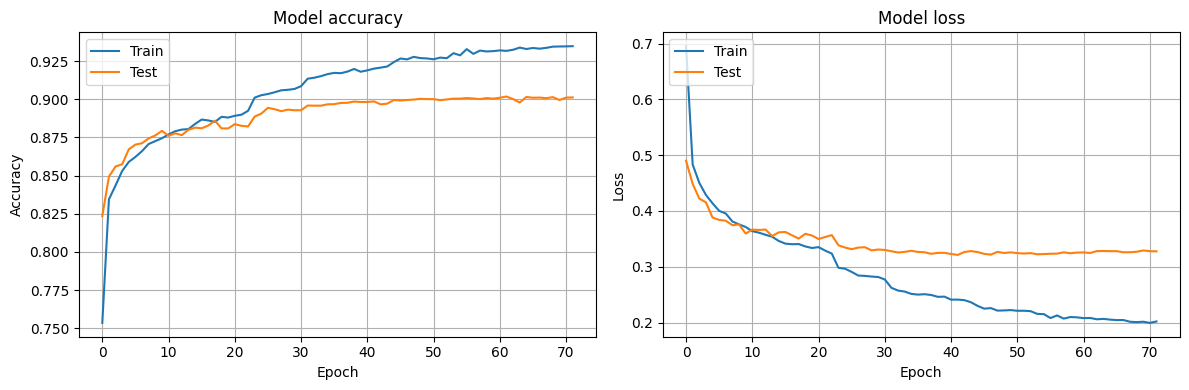

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Модель 8 - 0.9011
шарів - 4, нейронів - 2048, activation='relu', optimizer=RMSprop, batch_size = 2048, epochs = 100

Dense/Dropout = '2048/0.5-512/0.4-128/0.2-10'

***kernel_regularizer=not***

In [ ]:
learning_rate = 0.001
batch_size = 2048
epochs = 100
activation='relu'
optimizer=RMSprop
loss='categorical_crossentropy'

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(2048, activation=activation),
    Dropout(0.5),
    Dense(512, activation=activation),
    Dropout(0.4),
    Dense(128, activation=activation),
    Dropout(0.2),
    Dense(10, activation='softmax')
  ])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 2048)              1607680   
                                                                 
 dropout_28 (Dropout)        (None, 2048)              0         
                                                                 
 dense_38 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_29 (Dropout)        (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               65664     
                                                                 
 dropout_30 (Dropout)        (None, 128)              

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

Epoch 1/100
29/29 [==============================] - 2s 26ms/step - loss: 1.3399 - accuracy: 0.5197 - val_loss: 0.8084 - val_accuracy: 0.6862 - lr: 0.0010
Epoch 2/100
29/29 [==============================] - 0s 14ms/step - loss: 0.7553 - accuracy: 0.7218 - val_loss: 0.7172 - val_accuracy: 0.7084 - lr: 0.0010
Epoch 3/100
29/29 [==============================] - 0s 15ms/step - loss: 0.6249 - accuracy: 0.7689 - val_loss: 0.5304 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 4/100
29/29 [==============================] - 0s 16ms/step - loss: 0.5667 - accuracy: 0.7927 - val_loss: 0.5681 - val_accuracy: 0.7911 - lr: 0.0010
Epoch 5/100
29/29 [==============================] - 0s 15ms/step - loss: 0.5256 - accuracy: 0.8077 - val_loss: 0.5234 - val_accuracy: 0.7970 - lr: 0.0010
Epoch 6/100
29/29 [==============================] - 0s 15ms/step - loss: 0.5013 - accuracy: 0.8160 - val_loss: 0.5253 - val_accuracy: 0.8108 - lr: 0.0010
Epoch 7/100
29/29 [==============================] - 0s 16ms/step - lo

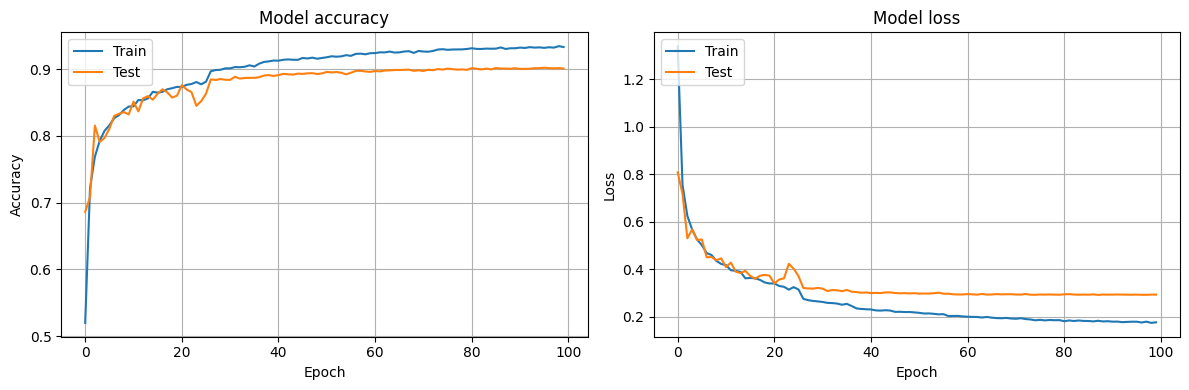

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Модель 9 - 0.9045
шарів - 5, нейронів - 1024, activation='sigmoid', optimizer=AdamW, batch_size = 256, epochs = 100

***Dense/Dropout = '1024/0.5-512/0.4-256/0.3-128-10'***

kernel_regularizer=not

In [ ]:
learning_rate = 0.001
batch_size = 256
epochs = 100
activation='sigmoid'
optimizer=AdamW
loss='categorical_crossentropy'

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(1024, activation=activation),
    Dropout(0.5),
    Dense(512, activation=activation),
    Dropout(0.4),
    Dense(256, activation=activation),
    Dropout(0.3),
    Dense(128, activation=activation),
    Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_31 (Dropout)        (None, 1024)              0         
                                                                 
 dense_42 (Dense)            (None, 512)               524800    
                                                                 
 dropout_32 (Dropout)        (None, 512)               0         
                                                                 
 dense_43 (Dense)            (None, 256)               131328    
                                                                 
 dropout_33 (Dropout)        (None, 256)              

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

Epoch 1/100
234/234 [==============================] - 4s 7ms/step - loss: 1.1060 - accuracy: 0.5854 - val_loss: 0.6450 - val_accuracy: 0.7666 - lr: 0.0010
Epoch 2/100
234/234 [==============================] - 1s 5ms/step - loss: 0.5785 - accuracy: 0.7879 - val_loss: 0.5111 - val_accuracy: 0.8130 - lr: 0.0010
Epoch 3/100
234/234 [==============================] - 1s 6ms/step - loss: 0.4837 - accuracy: 0.8285 - val_loss: 0.4572 - val_accuracy: 0.8379 - lr: 0.0010
Epoch 4/100
234/234 [==============================] - 1s 5ms/step - loss: 0.4396 - accuracy: 0.8435 - val_loss: 0.4241 - val_accuracy: 0.8490 - lr: 0.0010
Epoch 5/100
234/234 [==============================] - 1s 6ms/step - loss: 0.4130 - accuracy: 0.8509 - val_loss: 0.4084 - val_accuracy: 0.8517 - lr: 0.0010
Epoch 6/100
234/234 [==============================] - 1s 6ms/step - loss: 0.3899 - accuracy: 0.8580 - val_loss: 0.3953 - val_accuracy: 0.8560 - lr: 0.0010
Epoch 7/100
234/234 [==============================] - 1s 6ms/st

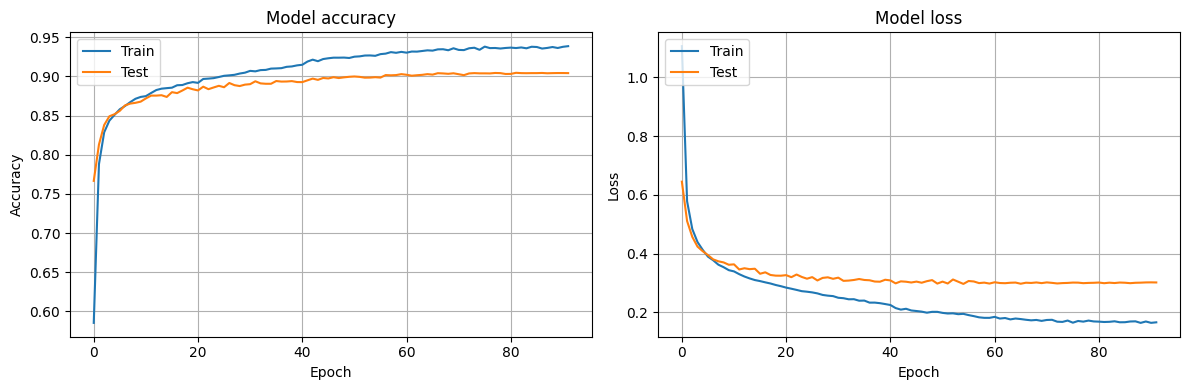

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Модель 10 - 0.9040
шарів - 5, нейронів - 1024, activation='selu', optimizer=AdamW, batch_size = 256, epochs = 100

Dense_Dropout = '1024/0.5-512/0.4-256/0.3-128-10'

In [ ]:
learning_rate = 0.001
batch_size = 256
epochs = 100
Dense_Dropout = '1024/0.5-512/0.4-256/0.3-128-10'
activation='selu'
optimizer=AdamW
loss='categorical_crossentropy'

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(1024, activation=activation),
    Dropout(0.5),
    Dense(512, activation=activation),
    Dropout(0.4),
    Dense(256, activation=activation),
    Dropout(0.3),
    Dense(128, activation=activation),
    Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_34 (Dropout)        (None, 1024)              0         
                                                                 
 dense_47 (Dense)            (None, 512)               524800    
                                                                 
 dropout_35 (Dropout)        (None, 512)               0         
                                                                 
 dense_48 (Dense)            (None, 256)               131328    
                                                                 
 dropout_36 (Dropout)        (None, 256)              

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

Epoch 1/100
234/234 [==============================] - 3s 6ms/step - loss: 0.7861 - accuracy: 0.7380 - val_loss: 0.5071 - val_accuracy: 0.8146 - lr: 0.0010
Epoch 2/100
234/234 [==============================] - 1s 6ms/step - loss: 0.5211 - accuracy: 0.8121 - val_loss: 0.4403 - val_accuracy: 0.8414 - lr: 0.0010
Epoch 3/100
234/234 [==============================] - 2s 10ms/step - loss: 0.4724 - accuracy: 0.8273 - val_loss: 0.4093 - val_accuracy: 0.8523 - lr: 0.0010
Epoch 4/100
234/234 [==============================] - 2s 9ms/step - loss: 0.4436 - accuracy: 0.8386 - val_loss: 0.4031 - val_accuracy: 0.8539 - lr: 0.0010
Epoch 5/100
234/234 [==============================] - 1s 6ms/step - loss: 0.4210 - accuracy: 0.8453 - val_loss: 0.4241 - val_accuracy: 0.8461 - lr: 0.0010
Epoch 6/100
234/234 [==============================] - 1s 6ms/step - loss: 0.4054 - accuracy: 0.8527 - val_loss: 0.3921 - val_accuracy: 0.8596 - lr: 0.0010
Epoch 7/100
234/234 [==============================] - 1s 6ms/s

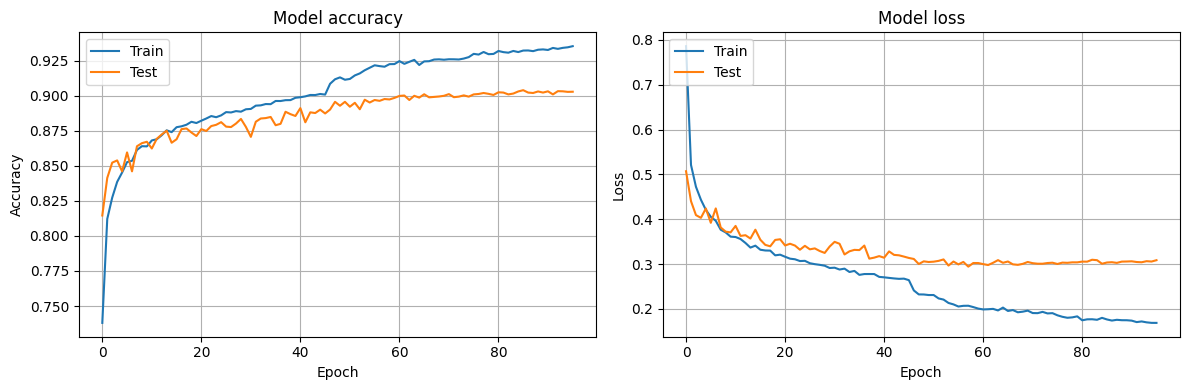

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Модель 11 - 0.8859
***шарів - 6, нейронів - 2048, activation='tanh', optimizer=RMSprop, batch_size = 512,*** epochs = 100

Dense/Dropout = '2048/0.5-1024/0.5-512/0.4-256/0.3-128-10'

kernel_regularizer=not

In [ ]:
learning_rate = 0.001
batch_size = 512
epochs = 100
activation='tanh'
optimizer=RMSprop
loss='categorical_crossentropy'

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(2048, activation=activation),
    Dropout(0.5),
    Dense(1024, activation=activation),
    Dropout(0.5),
    Dense(512, activation=activation),
    Dropout(0.4),
    Dense(256, activation=activation),
    Dropout(0.3),
    Dense(128, activation=activation),
    Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_51 (Dense)            (None, 2048)              1607680   
                                                                 
 dropout_37 (Dropout)        (None, 2048)              0         
                                                                 
 dense_52 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_38 (Dropout)        (None, 1024)              0         
                                                                 
 dense_53 (Dense)            (None, 512)               524800    
                                                                 
 dropout_39 (Dropout)        (None, 512)             

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

Epoch 1/100
117/117 [==============================] - 2s 11ms/step - loss: 0.9848 - accuracy: 0.6297 - val_loss: 0.7813 - val_accuracy: 0.7094 - lr: 0.0010
Epoch 2/100
117/117 [==============================] - 1s 8ms/step - loss: 0.5985 - accuracy: 0.7762 - val_loss: 0.5821 - val_accuracy: 0.7712 - lr: 0.0010
Epoch 3/100
117/117 [==============================] - 1s 9ms/step - loss: 0.5262 - accuracy: 0.8052 - val_loss: 0.4778 - val_accuracy: 0.8232 - lr: 0.0010
Epoch 4/100
117/117 [==============================] - 1s 10ms/step - loss: 0.4851 - accuracy: 0.8205 - val_loss: 0.4801 - val_accuracy: 0.8312 - lr: 0.0010
Epoch 5/100
117/117 [==============================] - 1s 9ms/step - loss: 0.4578 - accuracy: 0.8309 - val_loss: 0.5201 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 6/100
117/117 [==============================] - 1s 8ms/step - loss: 0.4416 - accuracy: 0.8367 - val_loss: 0.4226 - val_accuracy: 0.8475 - lr: 0.0010
Epoch 7/100
117/117 [==============================] - 1s 8ms/

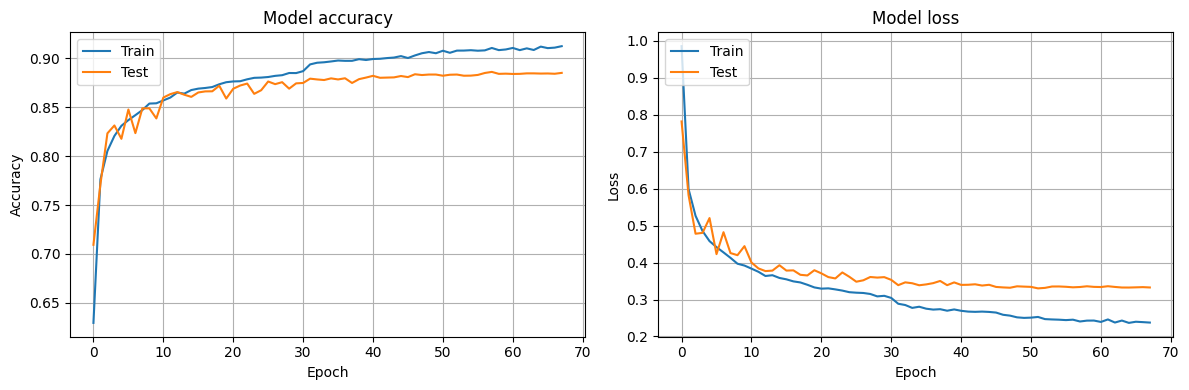

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Модель 12 - 0.9100
шарів - 4, нейронів - 2048, activation='relu', optimizer=Adam, batch_size = 1024, epochs = 100

Dense/Dropout = '2048/0.2-512/0.2-128/0.1-10'

***kernel_regularizer=not***

In [ ]:
learning_rate = 0.001
batch_size = 1024
epochs = 100
activation='relu'
optimizer=Adam
loss='categorical_crossentropy'

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(2048, activation=activation),
    Dropout(0.2),
    Dense(512, activation=activation),
    Dropout(0.2),
    Dense(128, activation=activation),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_57 (Dense)            (None, 2048)              1607680   
                                                                 
 dropout_41 (Dropout)        (None, 2048)              0         
                                                                 
 dense_58 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_42 (Dropout)        (None, 512)               0         
                                                                 
 dense_59 (Dense)            (None, 128)               65664     
                                                                 
 dropout_43 (Dropout)        (None, 128)             

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

Epoch 1/100
58/58 [==============================] - 2s 14ms/step - loss: 0.7008 - accuracy: 0.7556 - val_loss: 0.4620 - val_accuracy: 0.8335 - lr: 0.0010
Epoch 2/100
58/58 [==============================] - 1s 10ms/step - loss: 0.4226 - accuracy: 0.8474 - val_loss: 0.3879 - val_accuracy: 0.8604 - lr: 0.0010
Epoch 3/100
58/58 [==============================] - 1s 9ms/step - loss: 0.3654 - accuracy: 0.8678 - val_loss: 0.3633 - val_accuracy: 0.8703 - lr: 0.0010
Epoch 4/100
58/58 [==============================] - 1s 9ms/step - loss: 0.3360 - accuracy: 0.8776 - val_loss: 0.3474 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 5/100
58/58 [==============================] - 1s 9ms/step - loss: 0.3208 - accuracy: 0.8816 - val_loss: 0.3429 - val_accuracy: 0.8755 - lr: 0.0010
Epoch 6/100
58/58 [==============================] - 1s 9ms/step - loss: 0.2997 - accuracy: 0.8894 - val_loss: 0.3323 - val_accuracy: 0.8794 - lr: 0.0010
Epoch 7/100
58/58 [==============================] - 1s 9ms/step - loss: 0

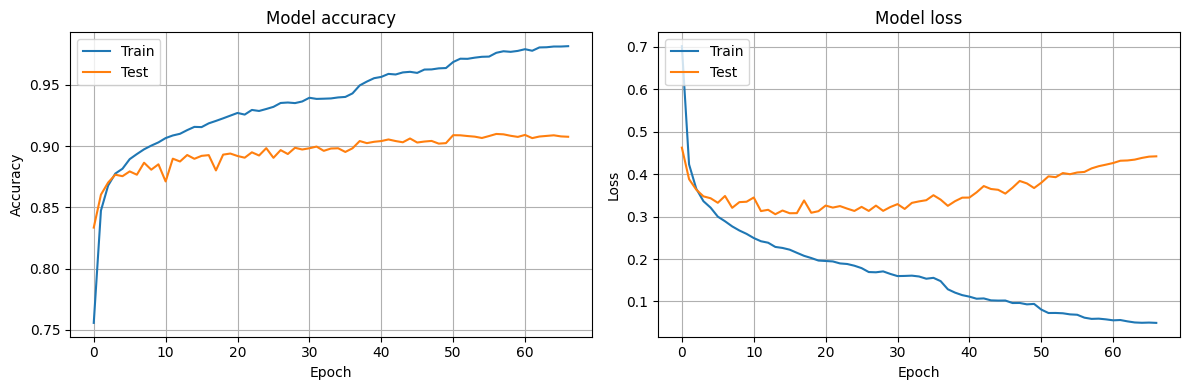

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Модель 13 - 0.9055
шарів - 5, нейронів - 1024, activation='relu', optimizer=Adam, batch_size = 1024, epochs = 100

Dense/Dropout = '1024-512-256-128-10'

kernel_regularizer=regularizers.l2(0.00001)

Train accuracy: 0.9948
Test accuracy: 0.9051

In [ ]:
learning_rate = 0.001
batch_size = 1024
epochs = 100
Dense_Dropout = '1024-512-256-128-10'
activation='relu'
optimizer=Adam
loss='categorical_crossentropy'

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(1024, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dense(512, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dense(256, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dense(128, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_61 (Dense)            (None, 1024)              803840    
                                                                 
 dense_62 (Dense)            (None, 512)               524800    
                                                                 
 dense_63 (Dense)            (None, 256)               131328    
                                                                 
 dense_64 (Dense)            (None, 128)               32896     
                                                                 
 dense_65 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1494154 (5.70 MB)
Trainable params: 149

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

Epoch 1/100
58/58 [==============================] - 3s 13ms/step - loss: 0.7002 - accuracy: 0.7600 - val_loss: 0.4783 - val_accuracy: 0.8387 - lr: 0.0010
Epoch 2/100
58/58 [==============================] - 0s 8ms/step - loss: 0.4253 - accuracy: 0.8537 - val_loss: 0.4183 - val_accuracy: 0.8597 - lr: 0.0010
Epoch 3/100
58/58 [==============================] - 0s 8ms/step - loss: 0.3709 - accuracy: 0.8729 - val_loss: 0.4001 - val_accuracy: 0.8636 - lr: 0.0010
Epoch 4/100
58/58 [==============================] - 0s 8ms/step - loss: 0.3317 - accuracy: 0.8863 - val_loss: 0.3781 - val_accuracy: 0.8721 - lr: 0.0010
Epoch 5/100
58/58 [==============================] - 0s 8ms/step - loss: 0.3115 - accuracy: 0.8920 - val_loss: 0.3669 - val_accuracy: 0.8698 - lr: 0.0010
Epoch 6/100
58/58 [==============================] - 0s 8ms/step - loss: 0.3026 - accuracy: 0.8952 - val_loss: 0.3515 - val_accuracy: 0.8820 - lr: 0.0010
Epoch 7/100
58/58 [==============================] - 0s 8ms/step - loss: 0.

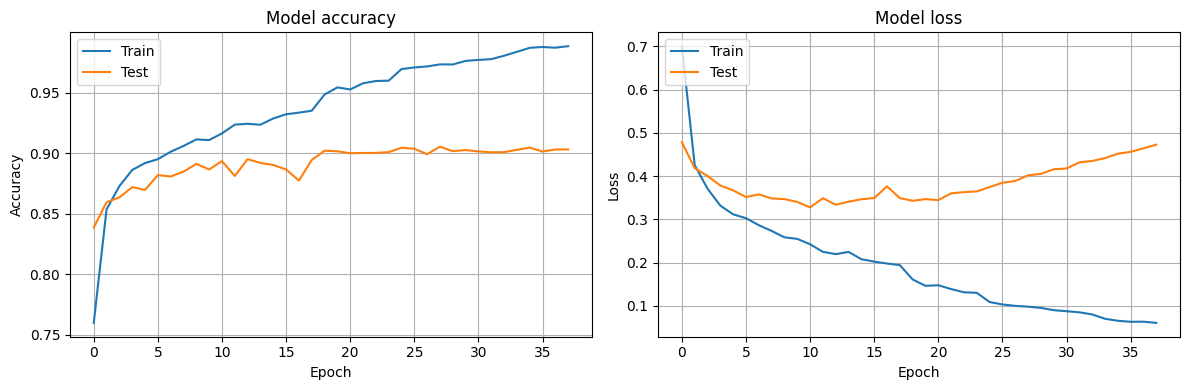

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Модель 14 - 0.9084

шарів - 4, нейронів - 2048, activation='relu', optimizer=Adam, batch_size = 1024, epochs = 100

Dense/Dropout = 2048/0.3-1024/0.4-512/0.3-10

regularizers.l2(0.00001)



In [ ]:
learning_rate = 0.001
batch_size = 1024
epochs = 100
activation='relu'
optimizer=Adam
loss='categorical_crossentropy'

In [ ]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(2048, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(1024, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.4),
    Dense(512, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(10, activation='softmax'),
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_66 (Dense)            (None, 2048)              1607680   
                                                                 
 dropout_44 (Dropout)        (None, 2048)              0         
                                                                 
 dense_67 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_45 (Dropout)        (None, 1024)              0         
                                                                 
 dense_68 (Dense)            (None, 512)               524800    
                                                                 
 dropout_46 (Dropout)        (None, 512)             

In [ ]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

Epoch 1/100
58/58 [==============================] - 2s 17ms/step - loss: 0.7331 - accuracy: 0.7445 - val_loss: 0.4867 - val_accuracy: 0.8321 - lr: 0.0010
Epoch 2/100
58/58 [==============================] - 1s 12ms/step - loss: 0.4444 - accuracy: 0.8502 - val_loss: 0.4213 - val_accuracy: 0.8596 - lr: 0.0010
Epoch 3/100
58/58 [==============================] - 1s 14ms/step - loss: 0.3944 - accuracy: 0.8665 - val_loss: 0.3953 - val_accuracy: 0.8676 - lr: 0.0010
Epoch 4/100
58/58 [==============================] - 1s 14ms/step - loss: 0.3751 - accuracy: 0.8753 - val_loss: 0.3916 - val_accuracy: 0.8714 - lr: 0.0010
Epoch 5/100
58/58 [==============================] - 1s 15ms/step - loss: 0.3565 - accuracy: 0.8795 - val_loss: 0.3739 - val_accuracy: 0.8762 - lr: 0.0010
Epoch 6/100
58/58 [==============================] - 1s 15ms/step - loss: 0.3407 - accuracy: 0.8865 - val_loss: 0.3622 - val_accuracy: 0.8781 - lr: 0.0010
Epoch 7/100
58/58 [==============================] - 1s 13ms/step - lo

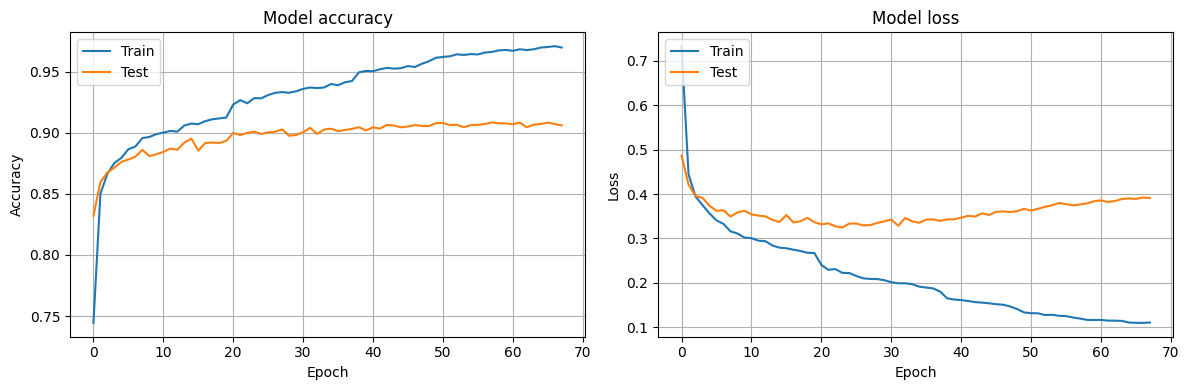

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Модель 15 - 0.9101
шарів - 4, нейронів - 2048, activation='relu', optimizer=Adam, batch_size = 2048, epochs = 100, learning_rate = 0.0005

Dense/Dropout = '2048/0.3-1024/0.4-512/0.2-10'

regularizers.l2(0.00001)

In [48]:
learning_rate = 0.0005
batch_size = 2048
epochs = 100
activation='relu'
optimizer=Adam
loss='categorical_crossentropy'

In [49]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

num_classes = 10
num_features = np.product(x_train.shape[1:])

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [50]:
model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(2048, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(1024, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.4),
    Dense(512, activation=activation, kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 2048)              1607680   
                                                                 
 dropout_27 (Dropout)        (None, 2048)              0         
                                                                 
 dense_37 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_28 (Dropout)        (None, 1024)              0         
                                                                 
 dense_38 (Dense)            (None, 512)               524800    
                                                                 
 dropout_29 (Dropout)        (None, 512)              

In [51]:
steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

Epoch 1/200
29/29 [==============================] - 3s 35ms/step - loss: 0.9093 - accuracy: 0.6921 - val_loss: 0.5511 - val_accuracy: 0.8175 - lr: 5.0000e-04
Epoch 2/200
29/29 [==============================] - 1s 20ms/step - loss: 0.5180 - accuracy: 0.8260 - val_loss: 0.4616 - val_accuracy: 0.8477 - lr: 5.0000e-04
Epoch 3/200
29/29 [==============================] - 1s 21ms/step - loss: 0.4405 - accuracy: 0.8543 - val_loss: 0.4291 - val_accuracy: 0.8573 - lr: 5.0000e-04
Epoch 4/200
29/29 [==============================] - 1s 23ms/step - loss: 0.4136 - accuracy: 0.8646 - val_loss: 0.4070 - val_accuracy: 0.8672 - lr: 5.0000e-04
Epoch 5/200
29/29 [==============================] - 1s 21ms/step - loss: 0.3840 - accuracy: 0.8725 - val_loss: 0.3926 - val_accuracy: 0.8727 - lr: 5.0000e-04
Epoch 6/200
29/29 [==============================] - 1s 22ms/step - loss: 0.3627 - accuracy: 0.8798 - val_loss: 0.3794 - val_accuracy: 0.8773 - lr: 5.0000e-04
Epoch 7/200
29/29 [===========================

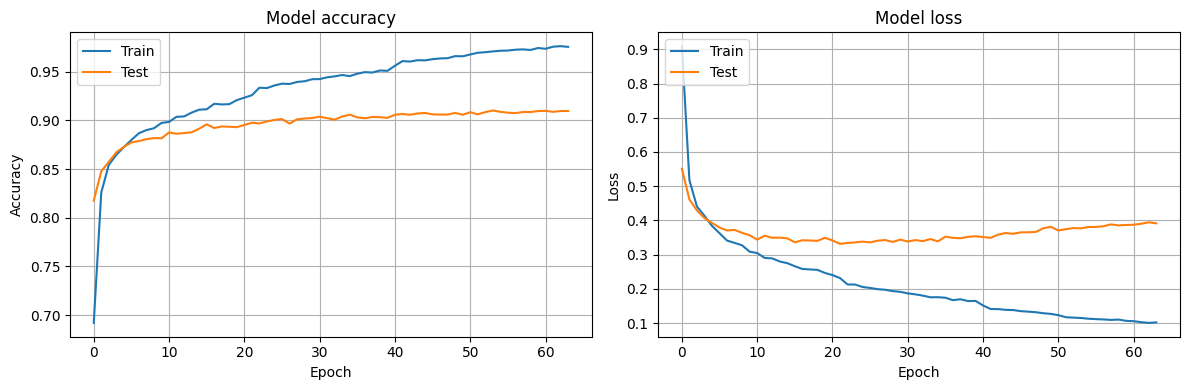

In [53]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Висновки
Були викорастані наступні:

- кількість шарів - 4, 5, 6
- кількість нейронів - 4096, 2048, 1024
- дропаут - 0.5, 0.4, 0.3, 0.2, 0.1
- функції активації - relu, selu, sigmoid, tanh
- кількість епох - 100
- розмір батчу - 256, 512, 1024, 2048, 4096
- вибір оптимізатора - Adam, AdamW, RMSprop
- техніки регуляризації - l1, l2, l1_l2
- крок навчання - 0.001, 0.0005, 0.0003, 0.0001

Також були викорастані callbacks функціїї EarlyStopping, ReduceLROnPlateau,
завдяки чому майже вдалося уникнути перенавчання моделей та оптимізації кількості епох.

Найкращі результати досягнуті:
- Модель 15 - 0.9101
шарів - 4, нейронів - 2048, activation='relu', optimizer=Adam, batch_size = 2048, epochs = 100, learning_rate = 0.0005,
Dense/Dropout = '2048/0.3-1024/0.4-512/0.2-10',
regularizers.l2(0.00001)
- Модель 4 - 0.9101,  шарів - 5, нейронів - 4096, activation='relu', optimizer=Adam, batch_size = 1024,
epochs = 100,
Dense/Dropout = '4096/0.2-2048/0.3-1024/0.4-512/0.2-10'б
regularizers.l2(0.00001),
learning_rate = 0.001
- Модель 12 - 0.9100
шарів - 4, нейронів - 2048, activation='relu', optimizer=Adam, batch_size = 1024, epochs = 100,
Dense/Dropout = '2048/0.2-512/0.2-128/0.1-10',
regularizer=not

І всеж таки в моделях 4 та 12 присутнє перенавчання. Так мені здається.